In [1]:
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import ( KMeans )
from sklearn.decomposition import ( PCA )
from sklearn.preprocessing import ( StandardScaler )
from scipy.cluster.hierarchy import ( dendrogram, linkage )

In [2]:
sns.set()

In [3]:
df_segmentation = pd.read_csv(
    'dataset/segmentation_data.csv', 
    index_col=0
)

In [4]:
# Query the data
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
# Coorelation Estimate
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


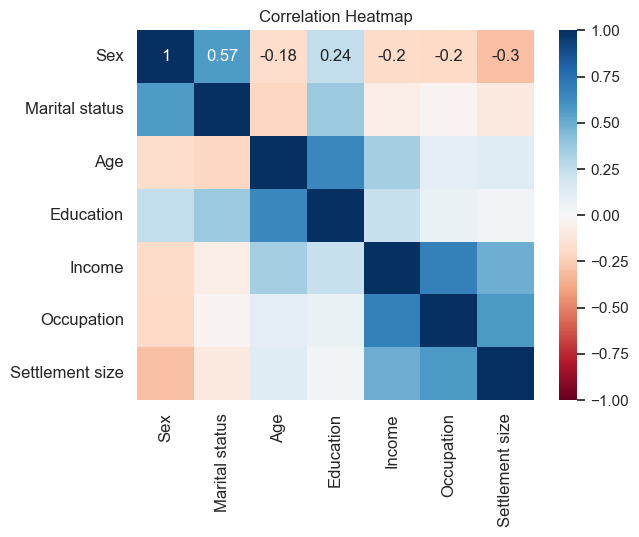

In [7]:
# Coorelation Heatmap plot
fig = sns.heatmap(
    df_segmentation.corr(),
    annot=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1
)
# set labels
fig.set_yticklabels(
    fig.get_yticklabels(),
    rotation = 0,
    fontsize = 12
)
fig.set_xticklabels(
    fig.get_xticklabels(),
    rotation = 90,
    fontsize = 12
)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

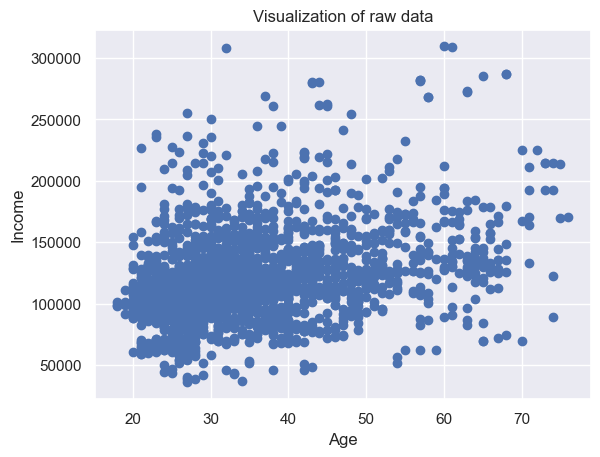

In [8]:
# Scatter plot code
plt.scatter(
    df_segmentation.iloc[:, 2],
    df_segmentation.iloc[:, 4]
)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

### Standardization

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

### Hierarchical clustering

In [10]:
hier_clust = linkage(
    segmentation_std, 
    method='ward'
)

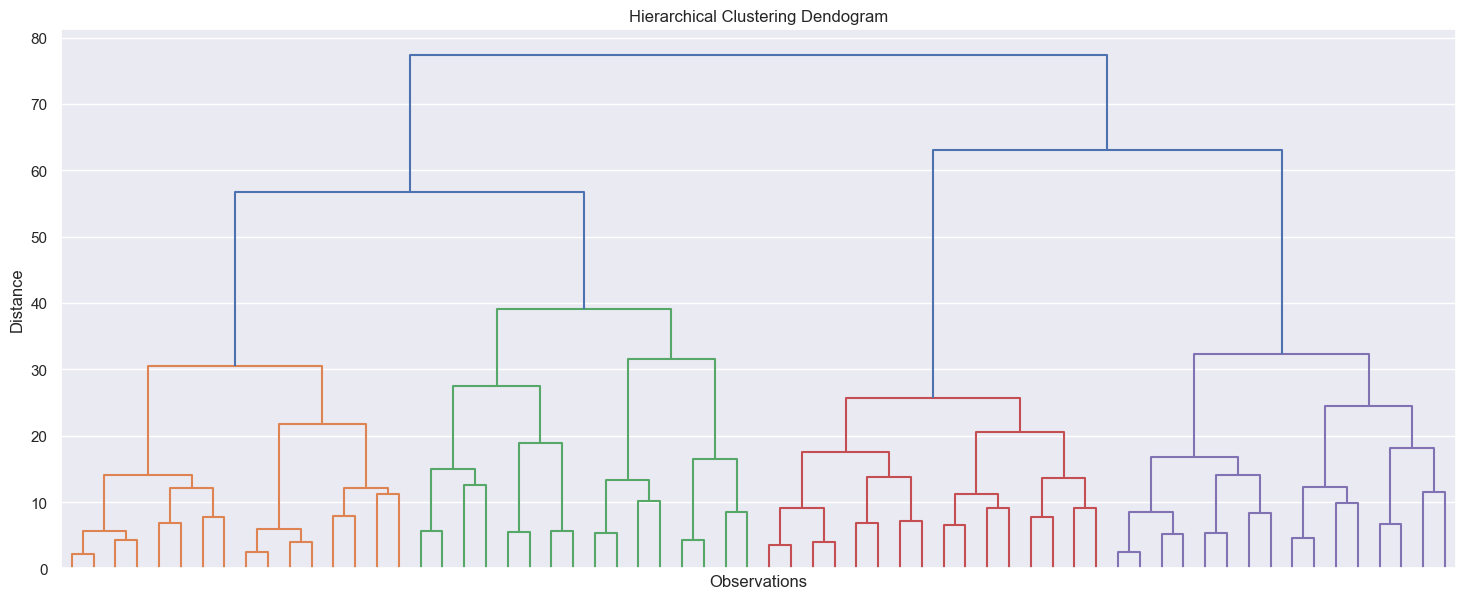

In [11]:
plt.figure(
    figsize=(
        18,7
    )
)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hier_clust,
    truncate_mode='level',
    p=5,
    show_leaf_counts=False,
    no_labels=True
)

plt.show()

### K Mean Clustering

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42, n_init='auto')
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-mean Clustering')

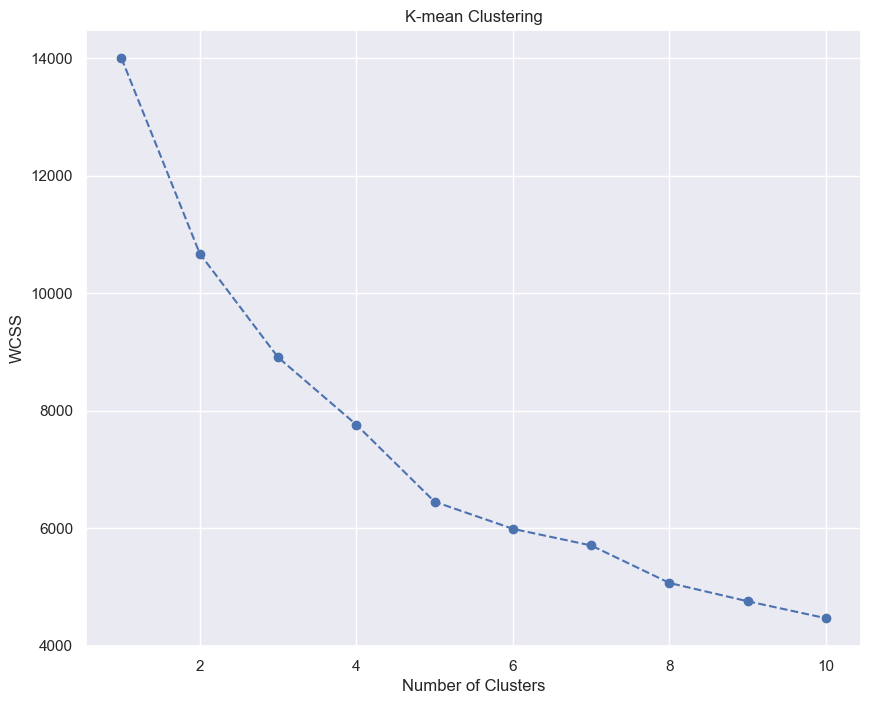

In [13]:
plt.figure(
    figsize=(
        10, 8
    )
)

plt.plot(
    range(1, 11),
    wcss,
    marker = 'o',
    linestyle = '--'
)

plt.xlabel(
    'Number of Clusters'
)

plt.ylabel(
    'WCSS'
)

plt.title('K-mean Clustering')

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state = 42)

In [15]:
kmeans.fit(segmentation_std)

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

### Results

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['segment_k_means'] = kmeans.labels_

In [17]:
df_segm_analytics = df_segm_kmeans.groupby(
    ['segment_k_means']
).mean()

df_segm_analytics

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment_k_means,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [18]:
df_segm_analytics['n_obs'] = df_segm_kmeans[
    ['segment_k_means', 'Sex']
].groupby(
    ['segment_k_means']
).count()

In [19]:
df_segm_analytics['prop_obs'] = df_segm_analytics['n_obs'] / df_segm_analytics['n_obs'].sum()
df_segm_analytics

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,prop_obs
segment_k_means,,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [20]:
df_segm_analytics.rename({
    0: 'standard',
    1: 'career_focused',
    2: 'fewer_opportunities',
    3: 'well_off'
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,prop_obs
segment_k_means,,,,,,,,,
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career_focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
fewer_opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
well_off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [21]:
df_segm_kmeans['labels'] = df_segm_kmeans['segment_k_means'].map({
    0: 'standard',
    1: 'career_focused',
    2: 'fewer_opportunities',
    3: 'well_off'
})

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

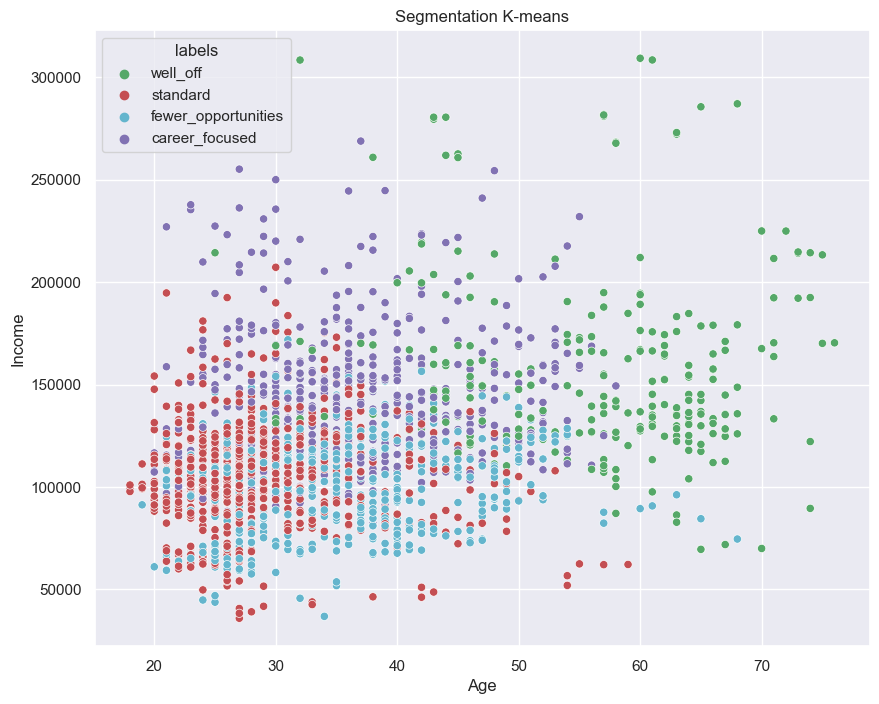

In [22]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']


plt.figure(
    figsize=(
        10, 8
    )
)

sns.scatterplot(
    x=x_axis,
    y=y_axis,
    hue = df_segm_kmeans['labels'],
    palette = ['g', 'r', 'c', 'm']
)

plt.title('Segmentation K-means')
plt.show()

### Principal Component Analysis

In [23]:
pca = PCA()

In [24]:
pca.fit(segmentation_std)

PCA()

In [25]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

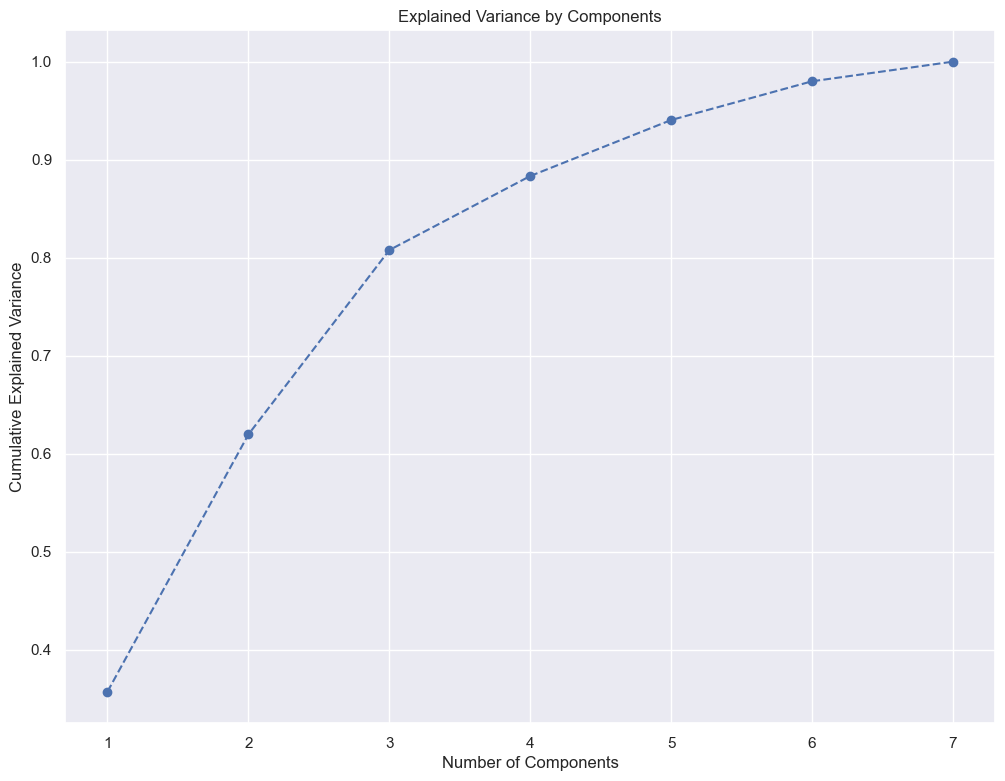

In [26]:
plt.figure(
    figsize=(12, 9)
)

plt.plot(
    range(1, 8),
    pca.explained_variance_ratio_.cumsum(),
    marker='o',
    linestyle='--'
)

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [27]:
pca = PCA(n_components=3)

In [28]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [30]:
df_pca_comp = pd.DataFrame(
    data = pca.components_,
    columns= df_segmentation.columns.values,
    index=['Component 1', 'Componenet 2', 'Component 3']
)

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Componenet 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x24a1cb6b9a0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Componenet 2'),
  Text(0, 2, 'Component 3')])

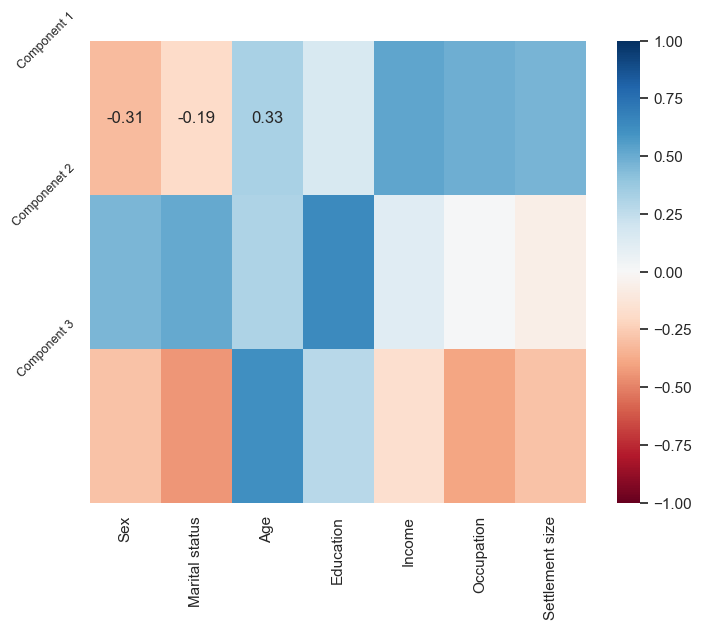

In [31]:
plt.figure(
    figsize=(8, 6)
)

sns.heatmap(
    df_pca_comp,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)

plt.yticks(
    [0, 1, 2], 
    ['Component 1', 'Componenet 2', 'Component 3'],
    rotation = 45,
    fontsize = 9
)

In [32]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [33]:
scores_pca = pca.transform(segmentation_std)

In [34]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state = 42, n_init='auto')
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-mean Clustering with PCA')

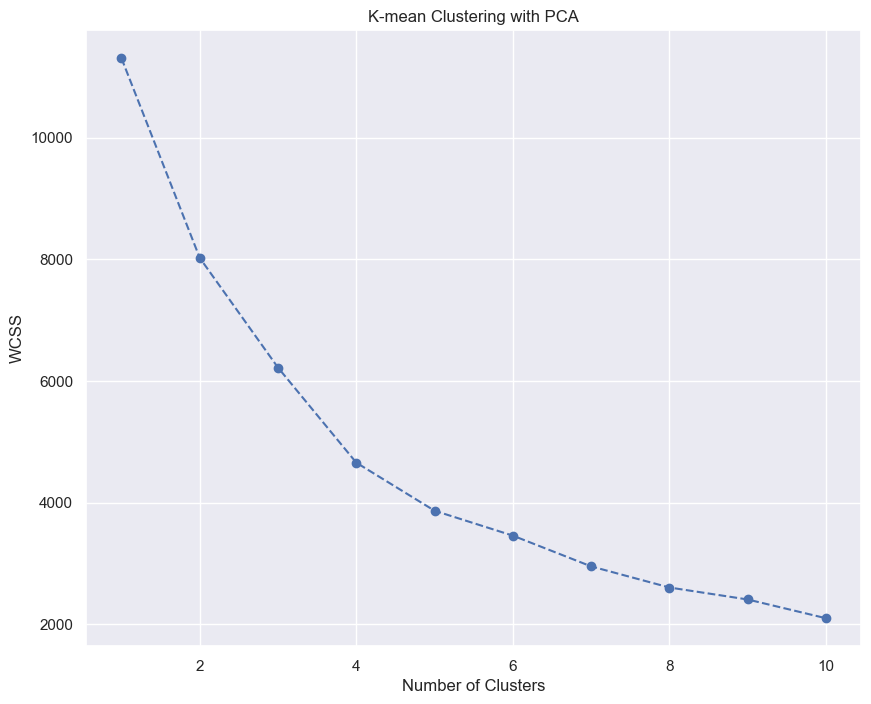

In [35]:
plt.figure(
    figsize=(
        10, 8
    )
)

plt.plot(
    range(1, 11),
    wcss,
    marker = 'o',
    linestyle = '--'
)

plt.xlabel(
    'Number of Clusters'
)

plt.ylabel(
    'WCSS'
)

plt.title('K-mean Clustering with PCA')

In [36]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [37]:
kmeans_pca.fit(scores_pca)

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [38]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['segment_k_means_pcs'] = kmeans_pca.labels_

In [39]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,segment_k_means_pcs
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,3
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [40]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['segment_k_means_pcs']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
segment_k_means_pcs,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644


In [41]:
df_segm_pca_kmeans_freq['n_obs'] = df_segm_pca_kmeans[
    ['segment_k_means_pcs', 'Sex']
].groupby(
    ['segment_k_means_pcs']
).count()

In [42]:
df_segm_pca_kmeans_freq['prop_obs'] = df_segm_pca_kmeans_freq['n_obs'] / df_segm_pca_kmeans_freq['n_obs'].sum()

In [43]:
df_segm_pca_kmeans_freq.rename({
    0: 'standard',
    1: 'career_focused',
    3: 'fewer_opportunities',
    2: 'well_off'
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,n_obs,prop_obs
segment_k_means_pcs,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career_focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
well_off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
fewer_opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300


In [44]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['segment_k_means_pcs'].map({
    0: 'standard',
    1: 'career_focused',
    3: 'fewer_opportunities',
    2: 'well_off'
})

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

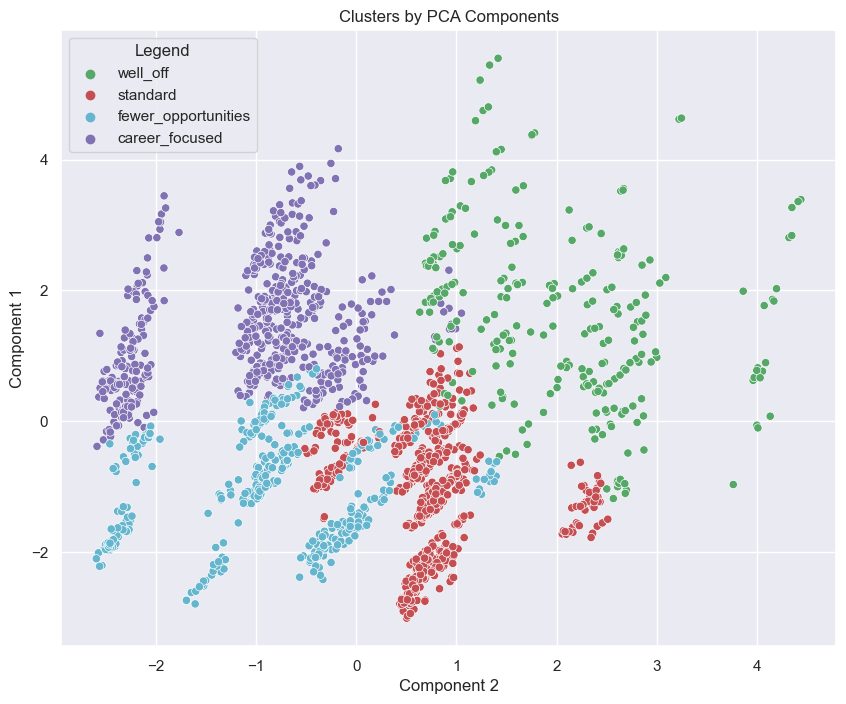

In [45]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']


plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

### Data Export

In [46]:
pickle.dump(scaler, open('data/scaler.pickle', 'wb'))

In [47]:
pickle.dump(pca, open('data/pca.pickle', 'wb'))

In [48]:
pickle.dump(kmeans_pca, open('data/kmeans_pca.pickle', 'wb'))